# MNIST_TensorFlow
今回はtensorfowのDNNを使い、MNISTを深層学習していきます。

## Tensor
TensorFlow（テンソルフロー）とは、さまざまな機械学習の分野で使用するためのOSS（オープンソフトウェアライブラリ）です。

OSS（オープンソフトウェアライブラリ）とは、著作権を保持している作者のソースコードを学習や変更、配布することが可能なライブラリ（汎用性の高いプログラムをひとまとめにしたもの）となります。

TensorFlowは公式サイトによると、

データフローグラフを使用した数値計算用のオープンソフトウェアライブラリです。　　  
グラフのノードは数学的演算を表し、グラフのエッジはそれらの間で伝達される多次元データ配列（テンソル）を表す。 　　  
柔軟なアーキテクチャにより、1つのAPIを使用してデスクトップ、サーバー、またはモバイルデバイスの1つ以上のCPUまたはGPUに計算を展開できます。　　  
と、説明されています。

## プレースホルダー（tf.placeholder）

プレースホルダーはデータが格納される入れ物。  
データは未定のままグラフを構築し、具体的な値は実行する時に与えます。  
プレースホルダーを作成することで、学習時に特徴量が同じであれば様々なデータで学習することが可能です。

## 変数（tf.Variable, tf.assign）

tf.Variable()で定義することができます。  


## session (tf.Session)

TensorFlowで、データフローグラフを用いた計算を実行する際は、以下のような形で、必ずSessionオブジェクトを作る必要があります。

sess = tf.Session()

セッションオブジェクトを作ったら、runコマンドに出力として使いたいopノードを指定して実行することで、グラフからの出力を計算できます。


# 必要なライブラリのインポート

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
import time

# データのインポート

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#プリセットのMNIST　one hotもしてくれる
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## データの分割

In [3]:
#trainとtestで分割
train, target = mnist.train.next_batch(2000)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [5]:
train.shape[1]

784

# 層の設計

In [6]:
# 層の数
input_unit = train.shape[1]
h_unit = [100,100,100]
out_unit = 10

In [7]:
# trainと教師データの特徴量と出力クラス数
x = tf.placeholder(tf.float32,[None,input_unit],name = "x")
t = tf.placeholder(tf.float32,[None,out_unit],name = "t")

In [8]:
# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
# 中間層目
W1 = tf.Variable(tf.truncated_normal([input_unit,h_unit[0]], mean=0.0, stddev=0.05),name = "W1")
b1 =  tf.Variable(tf.zeros([h_unit[0]]),name = "b1")

#バッチノーマライゼーションとrelu
xd = tf.layers.batch_normalization(tf.matmul(x,W1)+b1, training=True)
h1 = tf.nn.relu(xd,name = "h1")

In [10]:
# W1 = tf.Variable(tf.truncated_normal([input_unit,h_unit[0]], mean=0.0, stddev=0.05))
# b1 =  tf.Variable(tf.zeros([h_unit[0]]))
# h1 = tf.nn.relu(tf.matmul(x,W1)+ b1)

In [11]:
# 出力層
W2 = tf.Variable(tf.truncated_normal([h_unit[0],out_unit],mean=0.0, stddev=0.05),name = "W2")
b2 = tf.Variable(tf.zeros([out_unit]),name = "b2")
y  = tf.nn.softmax(tf.matmul(h1,W2)+ b2,name = "y")

In [12]:
# W2 = tf.Variable(tf.truncated_normal([h_unit[0],h_unit[1]]))
# b2 = tf.Variable(tf.zeros([h_unit[1]]))
# h2 = tf.nn.relu(tf.matmul(h1,W2)+ b2)

In [13]:
# W3 = tf.Variable(tf.truncated_normal([h_unit[1],out_unit]))
# b3 = tf.Variable(tf.zeros([out_unit]))
# y  = tf.nn.softmax(tf.matmul(h2,W3)+ b3)

In [14]:
# W4 = tf.Variable(tf.truncated_normal([h_unit[2],out_unit]))
# b4 = tf.Variable(tf.zeros([out_unit]))
# y = tf.nn.softmax(tf.matmul(h3,W4)+b4)

# 損失関数と正答率
テンソルボードで見やすくするために関数に名前をつけます。

In [15]:
#交差エントロピー　関数に名前付け
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [16]:
# cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))

In [17]:
# バックプロパゲーション　関数に名前付け
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [18]:
# 正答率　関数に名前付け
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(t,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
#セッションの作成
sess = tf.Session()
# 重みバイアスの初期化
sess.run(tf.global_variables_initializer())

# 学習

In [20]:
#時間計測
start = time.time()
num_epoch = 30
num_data = X_train.shape[0]
batch_size = 100
for epoch in range(num_epoch):
    for idx in range(0, num_data, batch_size):
        batch_x = X_train[idx: idx + batch_size if idx + batch_size < num_data else num_data]
        batch_t = y_train[idx: idx + batch_size if idx + batch_size < num_data else num_data]
        sess.run(train_step, feed_dict = {x: batch_x, t: batch_t})

elapsed_time = time.time() - start

print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


elapsed_time:5.595943927764893[sec]


In [21]:
# 重みバイアスの初期化
sess.run(tf.global_variables_initializer())

In [22]:
for epoch in range(100):
    sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 10 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_train,t:y_train})
        print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

classified = correct_prediction.eval(session=sess, feed_dict={
    x:train,
    t:target
})

prob = y.eval(session=sess,feed_dict={
    x:train,
    t:target
})
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

epoch: 0, Accuracy: 0.623125
epoch: 10, Accuracy: 0.898750
epoch: 20, Accuracy: 0.948750
epoch: 30, Accuracy: 0.968750
epoch: 40, Accuracy: 0.983125
epoch: 50, Accuracy: 0.993125
epoch: 60, Accuracy: 0.998750
epoch: 70, Accuracy: 0.999375
epoch: 80, Accuracy: 0.999375
epoch: 90, Accuracy: 0.999375
elapsed_time:20.964150190353394[sec]


# TensorBoardの保存

In [23]:
tf.summary.FileWriter('XOR', sess.graph)
merged = tf.summary.merge_all()

実行が終わったら、ターミナルを開いて以下を打ち込みましょう。  
$ tensorboard --logdir=/ディレクトリの絶対パス/XOR

In [24]:
# 重みバイアスの初期化
sess.run(tf.global_variables_initializer())

# テストデータを使った検証

In [25]:
for epoch in range(100):
    sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 10 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_test,t:y_test})
        print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

classified = correct_prediction.eval(session=sess, feed_dict={
    x:train,
    t:target
})

prob = y.eval(session=sess,feed_dict={
    x:train,
    t:target
})


epoch: 0, Accuracy: 0.600000
epoch: 10, Accuracy: 0.852500
epoch: 20, Accuracy: 0.872500
epoch: 30, Accuracy: 0.890000
epoch: 40, Accuracy: 0.887500
epoch: 50, Accuracy: 0.882500
epoch: 60, Accuracy: 0.890000
epoch: 70, Accuracy: 0.890000
epoch: 80, Accuracy: 0.887500
epoch: 90, Accuracy: 0.887500


正答率１００％にはなりませんでしたが、良く学習できています。

# 交差検証

In [26]:
#KFoldを使い交差検証

In [27]:
sess.run(tf.global_variables_initializer())

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from statistics import mean, median,variance,stdev

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
fit_data = [[],[]]
iterater = KFold(n_splits=3)
for epoch in range(10):
    for train_index, test_index in iterater.split(train):
        X_train, X_test = train[train_index], train[test_index]
        y_train, y_test = target[train_index], target[test_index]
        sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 1 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_train,t:y_train})
        test_acc_val = sess.run(accuracy,feed_dict={x:X_test,t:y_test})
        print ('epoch: %d, Accuracy: %f,test_Accuracy:%f'%(epoch, acc_val,test_acc_val))
        fit_data[0].append(acc_val)
        fit_data[1].append(test_acc_val)

epoch: 0, Accuracy: 0.763868,test_Accuracy:0.750751
epoch: 1, Accuracy: 0.855322,test_Accuracy:0.852853
epoch: 2, Accuracy: 0.892804,test_Accuracy:0.885886
epoch: 3, Accuracy: 0.904798,test_Accuracy:0.896396
epoch: 4, Accuracy: 0.913793,test_Accuracy:0.912913
epoch: 5, Accuracy: 0.926537,test_Accuracy:0.921922
epoch: 6, Accuracy: 0.931784,test_Accuracy:0.936937
epoch: 7, Accuracy: 0.943029,test_Accuracy:0.939940
epoch: 8, Accuracy: 0.948276,test_Accuracy:0.947447
epoch: 9, Accuracy: 0.954273,test_Accuracy:0.954955


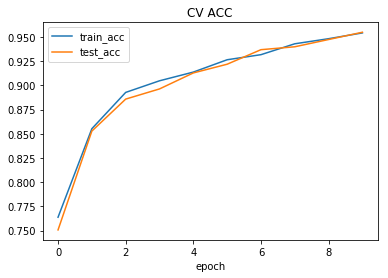

In [30]:
plt.plot([i for i in range(10)],fit_data[0],label = "train_acc")
plt.plot([i for i in range(10)],fit_data[1],label = "test_acc")
plt.xlabel('epoch')
plt.title("CV ACC")
plt.legend()


交差検証でしっかり過学習を起こしてない事もわかりました。  

# kerasで深層学習

## Kerasとは？
Kerasとは、TensorFlow上で動くニューラルネットワークライブラリの1つです。

Kerasを使用すると、ディープラーニングのベースとなっている数学的理論の部分をゼロから開発せずとも、比較的短いソースコードで実装することができます。

メリット  
・コードを書くのがとっても簡単  
・プログラミング未経験でも恐らく大丈夫  
・利用者も多い  

デメリット  
・処理の中身はコードからは全く分からない  
・オリジナルの処理をさせるのが面倒  
・計算グラフ構築後、変更不可能


## Sequential API

検証も含めて正則化(バッチノーマライゼーション)せずに学習

In [31]:
# モデルの作成
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# モデルのインスタンスを生成
model = Sequential()

#addで層を増やす
model.add(Dense(100, activation='relu', input_dim=784,name = "relu"))
model.add(Dense(10, activation='softmax',name="softmax"))

#compile(self, optimizer, loss, metrics=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
#訓練過程の設定
model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


Using TensorFlow backend.


In [32]:
#verbose: 0, 1または2．詳細表示モード．0とすると標準出力にログを出力しません． 
#1の場合はログをプログレスバーで標準出力，2の場合はエポックごとに1行のログを出力します．

hist = model.fit(X_train,y_train,batch_size=100,epochs=30,verbose=1, validation_data= (X_test, y_test))

Train on 1334 samples, validate on 666 samples
Epoch 1/30
1334/1334 [==============================] - 1s 442us/step - loss: 1.9828 - acc: 0.3546 - val_loss: 1.4731 - val_acc: 0.6757
Epoch 2/30
1334/1334 [==============================] - 0s 179us/step - loss: 1.1297 - acc: 0.7654 - val_loss: 0.9099 - val_acc: 0.7988
Epoch 3/30
1334/1334 [==============================] - 0s 178us/step - loss: 0.7135 - acc: 0.8381 - val_loss: 0.6613 -

In [33]:
score = model.evaluate(X_test, y_test)
print('Test loss:',score[0])
print("Test acc",score[1])

666/666 [==============================] - 0s 95us/step
Test loss: 0.344848836148
Test acc 0.903903904262


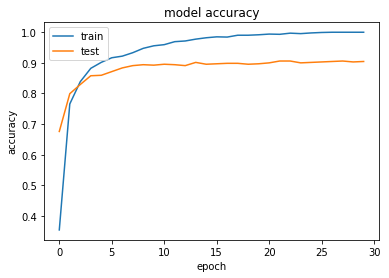

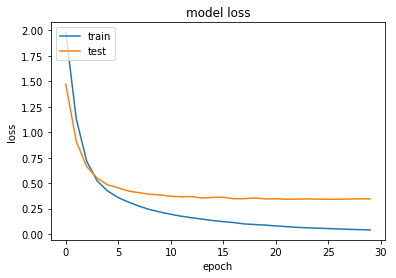

In [34]:
#Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

正則化しないと、過学習を起こしてしまうことがわかりました。

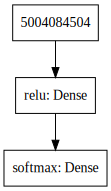

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu (Dense)                 (None, 100)               78500     
_________________________________________________________________
softmax (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Functional API

In [37]:
from keras.layers import Input, Dense
from keras.models import Model
inputs = Input(shape=(784,))

x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(X_train,y_train,batch_size=100,epochs=30,verbose=1)

elapsed_time = time.time() - start

print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")



Epoch 1/30
1334/1334 [==============================] - 1s 441us/step - loss: 2.0584 - acc: 0.3366
Epoch 2/30
1334/1334 [==============================] - 0s 133us/step - loss: 1.3456 - acc: 0.7189
Epoch 3/30
1334/1334 [==============================] - 0s 136us/step - loss: 0.8018 - acc: 0.7991

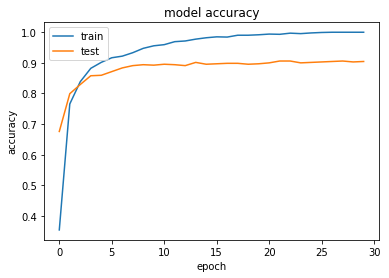

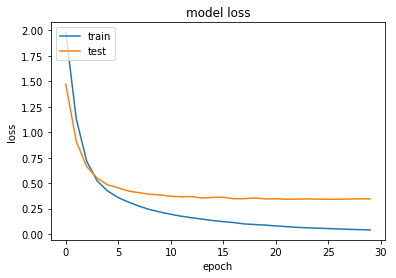

In [38]:
#Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Functional APIでもしっかり学習ができました。

# 実行時間
最後にスクラッチコードとKerasでどのくらい実行時間が違うか見ていきましょう。

同条件  
ミニバッチ１００  
イテレーション３０  

**・スクラッチ時の実行時間**  
elapsed_time:5.367533206939697[sec]

**・kerasの時間**  
elapsed_time:6.171715021133423[sec]  

やはりtensorflowに直接書いた方が少し早いですね！



これで終わりになります。  
DNNのスクラッチをやったことで、tensorflowの実装もとても楽にできました。